<a href="https://colab.research.google.com/github/Scor999/Data-Science-Numpy-Matplotlib-Scikit-learn/blob/main/dz4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Урок 8. Видеоурок. Обучение без учителя в Scikit-learn.
Задание 1     
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.  
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.  
Масштабируйте данные с помощью StandardScaler.  
Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.  
Постройте диаграмму рассеяния на этих данных.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Загрузка данных
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='MEDV')

In [4]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Применение TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

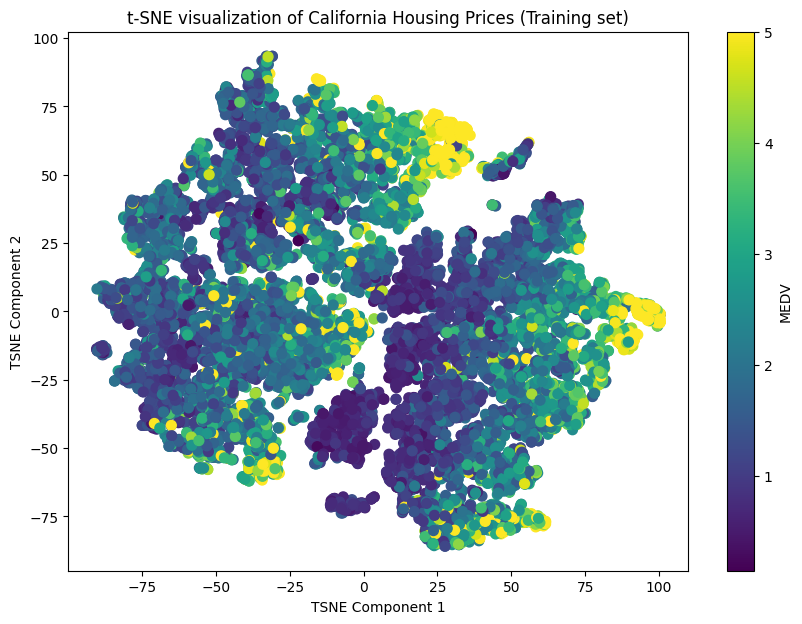

In [7]:
# Построение диаграммы рассеяния
plt.figure(figsize=(10, 7))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', s=50)
plt.colorbar(label='MEDV')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('t-SNE visualization of California Housing Prices (Training set)')
plt.show()

Задание 2   
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.  
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [8]:
from sklearn.cluster import KMeans

# Применение KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
kmeans.fit(X_train_scaled)
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


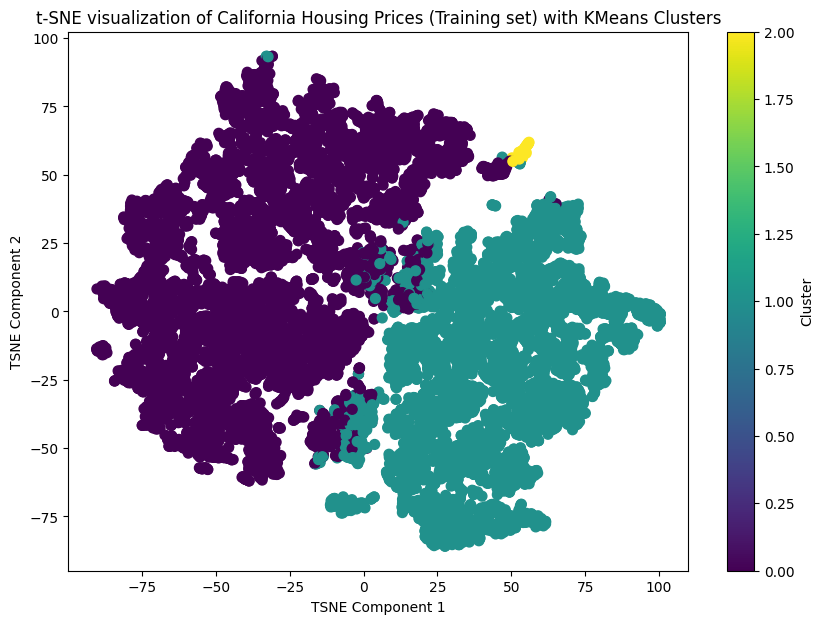

In [14]:
# Построение диаграммы рассеяния с окраской по кластерам
plt.figure(figsize=(10, 7))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters, cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('t-SNE visualization of California Housing Prices (Training set) with KMeans Clusters')
plt.show()


<span style="background-color: #FFFF00">В наборе данных California Housing отсутствует признак CRIM, который присутствовал в наборе данных Boston Housing. Вместо CRIM будем использовать другие признаки для анализа.    
Для продолжения будем использовать доступные признаки в наборе данных California Housing. Например, используем MedInc (средний доход) и HouseAge (возраст домов).</span>

In [15]:
# Создание DataFrame для тренировочного набора с добавлением кластеров
X_train_with_clusters = X_train.copy()
X_train_with_clusters['Cluster'] = clusters
X_train_with_clusters['MEDV'] = y_train.values

# Вычисление средних значений MedInc и HouseAge в кластерах
cluster_means = X_train_with_clusters.groupby('Cluster').mean()[['MEDV', 'MedInc', 'HouseAge']]
print(cluster_means)

             MEDV    MedInc   HouseAge
Cluster                               
0        2.142137  3.925416  28.473081
1        1.979968  3.824625  28.890443
2        1.618831  3.336702  18.276923


Задание 3   
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.    
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [16]:
# Применение KMeans к тестовому набору
test_clusters = kmeans.predict(X_test_scaled)

In [17]:
# Создание DataFrame для тестового набора с добавлением кластеров
X_test_with_clusters = X_test.copy()
X_test_with_clusters['Cluster'] = test_clusters
X_test_with_clusters['MEDV'] = y_test.values

# Вычисление средних значений MedInc и HouseAge в кластерах
test_cluster_means = X_test_with_clusters.groupby('Cluster').mean()[['MEDV', 'MedInc', 'HouseAge']]
print(test_cluster_means)


             MEDV    MedInc   HouseAge
Cluster                               
0        2.131424  3.902692  28.278282
1        1.949519  3.730525  29.534595
2        1.607133  3.399747  20.400000
